In [164]:
import pandas as pd 
import numpy as np 

Passo 1 : Rodando em arquivo txt pelo próprio link, limpando o cabeçalho que estava bugando e salvando o arquivo em txt e passando pro excel

In [165]:
import pandas as pd
from datetime import datetime, timedelta
import requests

# URL base com formato para aammdd
url_base = "https://www.anbima.com.br/informacoes/merc-sec-debentures/arqs/db{}.txt"

# Função para verificar se é dia útil (segunda a sexta)
def is_weekday(date):
    return date.weekday() < 5

# Obtendo os últimos 5 dias úteis (sem contar hoje)
date = datetime.today() - timedelta(days=1)
dates = []
while len(dates) < 6:
    if is_weekday(date):
        dates.append(date)
    date -= timedelta(days=1)

# Extraindo e salvando os dados
for date in dates:
    # Gerar a data no formato aammdd
    date_str = date.strftime('%y%m%d')
    url = url_base.format(date_str)

    # Fazer o download do arquivo e salvá-lo como TXT
    response = requests.get(url)
    if response.status_code == 200:
        # Nomear os arquivos com a data
        raw_file_name = f"dados_raw_{date_str}.txt"
        clean_file_name = f"dados_clean_{date_str}.txt"
        excel_file_name = f"20{date_str}.xlsx"

        # Salvar o arquivo bruto
        with open(raw_file_name, "wb") as file:
            file.write(response.content)
        
        # Limpar o arquivo para remover as linhas iniciais
        with open(raw_file_name, "r", encoding="latin1") as raw_file:
            lines = raw_file.readlines()
        
        # Ignorar as linhas iniciais irrelevantes
        clean_lines = lines[2:]  # Pula as duas primeiras linhas
        with open(clean_file_name, "w", encoding="latin1") as clean_file:
            clean_file.writelines(clean_lines)
        
        print(f"Arquivo limpo salvo como '{clean_file_name}'")
        
        # Processar o arquivo limpo para criar um DataFrame
        df = pd.read_csv(clean_file_name, sep='@', encoding="latin1")
        colunas_pedidas = ['Código','Nome','PU','Taxa de Compra','Taxa de Venda','Taxa Indicativa']
        df = df[colunas_pedidas]
        df['Data'] = date.strftime('%Y-%m-%d') 
         
        
        # Salvar o DataFrame em Excel
        df.to_excel(excel_file_name, index=False)
        print(f"Dados processados e salvos em '{excel_file_name}'")
    else:
        print(f"Erro ao acessar o arquivo para a data {date_str}: {response.status_code}")


Arquivo limpo salvo como 'dados_clean_241118.txt'
Dados processados e salvos em '20241118.xlsx'
Erro ao acessar o arquivo para a data 241115: 404
Arquivo limpo salvo como 'dados_clean_241114.txt'
Dados processados e salvos em '20241114.xlsx'
Arquivo limpo salvo como 'dados_clean_241113.txt'
Dados processados e salvos em '20241113.xlsx'
Arquivo limpo salvo como 'dados_clean_241112.txt'
Dados processados e salvos em '20241112.xlsx'
Arquivo limpo salvo como 'dados_clean_241111.txt'
Dados processados e salvos em '20241111.xlsx'


Rodando os Arquivos Salvos e definindo como dfs para conseguir manipular os dados

In [166]:
import pandas as pd
from datetime import datetime, timedelta

# Dicionário para armazenar os DataFrames
dataframes = {}

# Função para verificar se é dia útil (segunda a sexta)
def is_weekday(date):
    return date.weekday() < 5

# Obtendo os últimos 5 dias úteis (sem contar hoje)
date = datetime.today() - timedelta(days=1)
dates = []
while len(dates) < 6:
    if is_weekday(date):
        dates.append(date)
    date -= timedelta(days=1)

# Contador para indexar os DataFrames sem pular
df_index = 1

# Iterar sobre as datas e carregar os arquivos Excel
# Iterar sobre as datas e carregar os arquivos Excel
for date in dates:
    # Gerar a data no formato 'aammdd'
    date_str = date.strftime('%y%m%d') # Exemplo: '241108'
    file_name = f"20{date_str}.xlsx"  # Nome do arquivo Excel salvo
    try:
        # Criar variáveis dinamicamente para cada DataFrame
        exec(f"df{df_index} = pd.read_excel(file_name)")
        print(f"Arquivo '{file_name}' carregado como 'df{df_index}'.")
        df_index += 1
    except FileNotFoundError:
        print(f"Arquivo '{file_name}' não encontrado.")
    except KeyError:
        print(f"Erro ao processar '{file_name}': Arquivo pode estar indisponível no site.")


Arquivo '20241118.xlsx' carregado como 'df1'.
Arquivo '20241115.xlsx' não encontrado.
Arquivo '20241114.xlsx' carregado como 'df2'.
Arquivo '20241113.xlsx' carregado como 'df3'.
Arquivo '20241112.xlsx' carregado como 'df4'.
Arquivo '20241111.xlsx' carregado como 'df5'.


Passo 2: Juntando em um único 

In [167]:
import pandas as pd

# Lista com os DataFrames que você já tem
data = [df1, df2, df3, df4, df5]

# Concatenar todos os DataFrames
df_junto = pd.concat(data, ignore_index=True)
df_junto


,Código,Nome,PU,Taxa de Compra,Taxa de Venda,Taxa Indicativa,Data
0,AALR13,CENTRO DE IMAGEM DIAGNOSTICOS S/A (*) (**),"828,249697",--,"5,1277","9,2764",2024-11-18
1,AEGE16,EQUIPAV SANEAMENTO S.A. (*) (**),"1066,422663","3,15","2,7093","2,96",2024-11-18
2,AEGP14,AEGEA SANEAMENTO E PARTICIPAÇÕES S/A (*) (**),"519,334063","0,5","0,1","0,3046",2024-11-18
3,AEGP17,AEGEA SANEAMENTO E PARTICIPAÇÕES S/A (*) (**),"1020,8855","1,5123","1,35","1,4258",2024-11-18
4,AEGP19,AEGEA SANEAMENTO E PARTICIPAÇÕES S/A (*),"1021,565257","1,7196","1,5","1,6017",2024-11-18
...,...,...,...,...,...,...,...
5043,LIGHD3,LIGHT SERVICOS DE ELETRICIDADE S/A,"512,5",--,--,--,2024-11-11
5044,LIGHA5,LIGHT SERVICOS DE ELETRICIDADE S/A,510,--,--,--,2024-11-11
5045,LIGHA9,LIGHT SERVIÇOS DE ELETRICIDADE S/A,510,--,--,--,2024-11-11
5046,LIGHB0,LIGHT SERVIÇOS DE ELETRICIDADE S/A,510,--,--,--,2024-11-11


Próximo Passo 

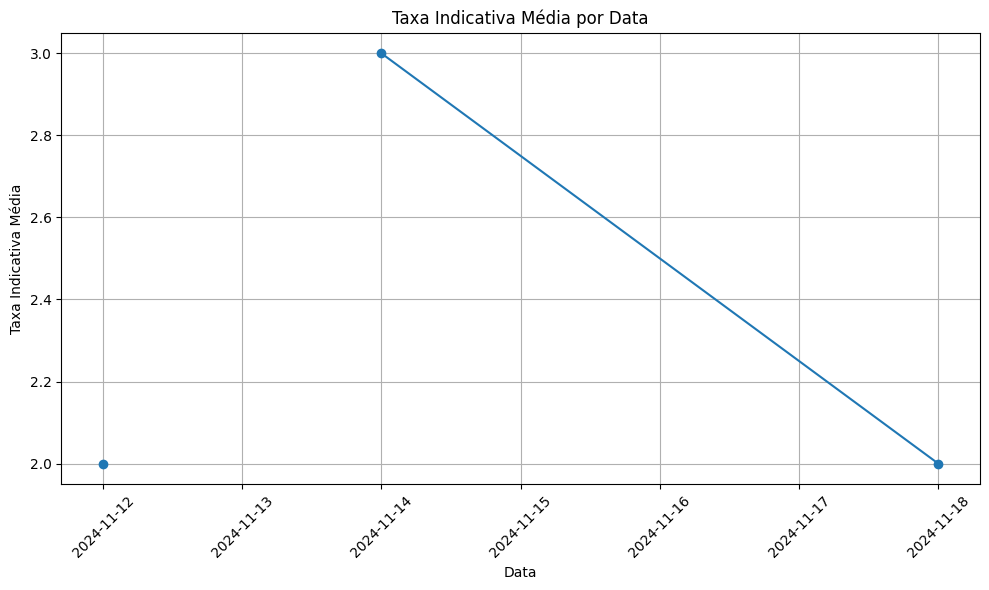

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o DataFrame consolidado seja 'df_junto'
# Converter a coluna 'Data' para datetime, se necessário
df_junto['Data'] = pd.to_datetime(df_junto['Data'], format='%Y-%m-%d')

# Garantir que a coluna 'Taxa Indicativa' seja numérica
df_junto['Taxa Indicativa'] = pd.to_numeric(df_junto['Taxa Indicativa'], errors='coerce')

# Agrupar por 'Data' e calcular a média da 'Taxa Indicativa'
media_por_data = df_junto.groupby('Data')['Taxa Indicativa'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(media_por_data['Data'], media_por_data['Taxa Indicativa'], marker='o')
plt.title('Taxa Indicativa Média por Data')
plt.xlabel('Data')
plt.ylabel('Taxa Indicativa Média')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("grafico_taxa_indicativa_media_por_data.png")  # Salvar como imagem
plt.show()



Códigos SQL 

In [169]:
a = """SELECT COUNT(*) 
FROM debentures 
WHERE data = (SELECT MAX(data) FROM debentures WHERE data < CURDATE());"""

In [170]:
b = """SELECT data, AVG(duration) AS duration_media 
FROM debentures 
WHERE data IN (SELECT DISTINCT data FROM debentures ORDER BY data DESC LIMIT 5)
GROUP BY data;"""

In [171]:
c = """SELECT DISTINCT codigo 
FROM debentures 
WHERE nome LIKE 'VALE S/A%'; """
